<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/SerpientesEscaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema juego serpientes y escaleras**

Dado el tablero para jugar serpientes y escaleras que se presenta a continuación, calcule el número promedio de lanzamientos de un dado nivelado de seis caras (un lanzamiento por turno, por avance) que se necesita para terminar el juego.

Suponer que en esta versión del clásico juego uno no avanza en dirección contraria desde la última casilla si el lanzamiento que se hizo indicó un número de pasos que excedió a la localización de la ya mencionada casilla ganadora.

Representamos el tablero gráficamente. Implementamos el siguiente código:

In [168]:
import numpy as np
import random as rand
from scipy.stats import norm
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

Ingresamos el número $n$ de filas (*n_row*) y $m$ de columnas (*n_col*) que tendrá nuestro tablero de tamaño $n\times m$.

In [170]:
n_row = 5                    # Número de filas.
n_col = 4                    # Número de columnas.
n_squares = n_row * n_col

Ingresamos de dónde a dónde estarán nuestras escaleras y serpientes.

***Nota:*** Cada escalera o serpiente deberá de ser ingresada dentro de una lista de forma ascendente y descendente respectivamente, y el conjunto de cada uno de estos en una lista de listas (matriz).



```
escaleras =  [[casilla de inicio, casilla de término], ... , [casilla de inicio, casilla de término]]

serpientes =  [[casilla de inicio, casilla de término], ... , [casilla de inicio, casilla de término]]
```

In [171]:
stairs = [[3, 11], [15, 19]]
snakes = [[13, 4], [17, 10]]

Ahora imprimimos nuestro tablero de juego para visualizar mejor lo que está ocurriendo.

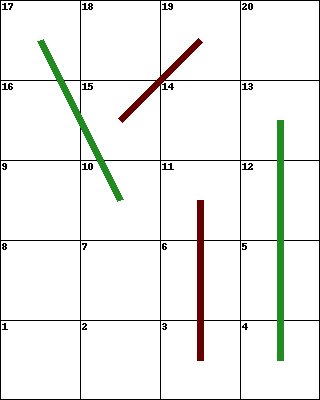

In [172]:
size_ver = 400    # Tamaño vertical en pixeles del tablero.

size_hor = round(size_ver * n_col/n_row)
col_spawn = round(size_hor/n_col)
row_spawn = round(size_ver/n_row)

board = Image.new('RGB', (size_hor, size_ver), (255, 255, 255))    # Generando tablero blanco.
draw = ImageDraw.Draw(board)                                       # Creando objeto para poder dibujar el tablero.

# Dibujando líneas verticales.
bias = 0
for i in range(n_col + 1):
  if i == n_col:
    bias = 1
  draw.line([(i * col_spawn - bias, - bias), (i * col_spawn - bias, size_ver - bias)], fill = 0)

# Dibujando líneas horizontales.
bias = 0
for i in range(n_row + 1):
  if i == n_row:
    bias = 1
  draw.line([(- bias, i * row_spawn - bias), (size_hor - bias, i * row_spawn - bias)], fill = 0)  

# Dibujando números de cada casilla.
bias = 1
counter = 0
for i in range(n_row):
  if i % 2 == 0:
    for j in range(n_col):
      counter += 1
      draw.text((j * col_spawn + bias + 1, (n_row - 1 - i) * row_spawn + bias), str(counter), fill = 0)
  else:
    for j in range(n_col-1, -1, -1):
      counter += 1
      draw.text((j * col_spawn + bias + 1, (n_row - 1 - i) * row_spawn + bias), str(counter), fill = 0)

# Función para almacenar las coordenadas del centro de cada casilla en una lista.
def coordinates(mtr):
  stroke = []
  for arr in mtr:
    coor = []
    for square in arr:
      flag = 0
      for i in range(n_row):
        if flag == square:
          break
        y = (n_row - i - 0.5) * row_spawn
        if i % 2 == 0:
          for j in range(n_col):
            x = (j + 0.5) * col_spawn
            flag += 1
            if flag == square:
              break
        else:
          for j in range(n_col-1, -1, -1):
            x = (j + 0.5) * col_spawn
            flag += 1
            if flag == square:
              break
      coor.append((x, y))
    stroke.append(coor)
  return stroke
    
# Dibujando serpientes y escaleras.
stair_strokes = coordinates(stairs)
for stair in stair_strokes:
  draw.line(stair, fill = 100, width = 7)

snake_strokes = coordinates(snakes)
for snake in snake_strokes:
  draw.line(snake, fill = (34,139,34), width = 7)

# Imprimiendo tablero de juego completo.
board.show()

# **Resolución**
## **1. Identifique las variables.**

Tenemos una: 

1.   $X:=$ Número de casillas a avanzar (lanzamiento de un dado).

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema, se sigue que la variable aleatoria posee una distribución uniforme discreta.

## **3. Modele las variables aleatorias.**

La distribución de probabilidad de $\,X\,$ es

|$X$|1|2|3|4|5|6|
|-|-|-|-|-|-|-
|$P(X)$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|

## **4. Defina el modelo del sistema y los objetivos de la simulación.**

$X\,$ determina el número de casillas que avanzamos por turno.

### **Objetivo:**

Generar suficientes $\,X\,$ hasta ganar una partida. Contaremos el número de tiros que se necesitaron para ganar muchas partidas y determinaremos el número promedio de tiros para ganar el juego con el tablero especificado. 

Por lo tanto, implementamos el siguiente código:

In [184]:
def partida():                                                                      # Función que simula una partida del juego y
  casilla = 1                                                                       #devuelve el número de lanzamientos que se
  turno = 0                                                                         #necesitaron para que un jugador gane.
  while casilla < n_squares:
    X = np.random.choice([1, 2, 3, 4, 5, 6], p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
    casilla += X
    turno += 1
    for stair,snake in stairs,snakes:
      if casilla == stair[0]:
        casilla = stair[1]
      elif casilla == snake[0]:
        casilla = snake[1]
  return turno

In [208]:
partida()

5

## **5. Diseñe el experimento.**

Para estimar el número promedio de turnos necesarios para ganar el juego, ejecutamos $n$ veces la función anterior para simular $n$ partidas del juego y calculamos de manera acumulativa el número de tiros promedio necesarios para ganar una partida.

In [189]:
def experimento(n):                   # Función que devuelve lista "evol_prom" con los valores del número promedio de tiros estimado,
  evol_prom = []                      #el cual se calcula sumando iteradamente los tiros promedio que se hicieron para ganar cada
  turnos = 0                          #partida y dividir esta cantidad entre las veces que se ha jugado una partida. Todo esto con
  for i in range(n):                  #mientras aumenta el número de observaciones hasta llegar a "n".
    turnos += partida()
    evol_prom.append(turnos/(i+1))    
  return evol_prom

In [209]:
evol_prom = experimento(10000)    # Realizamos el experimento con tamaño de muestra grande y arbitraria.

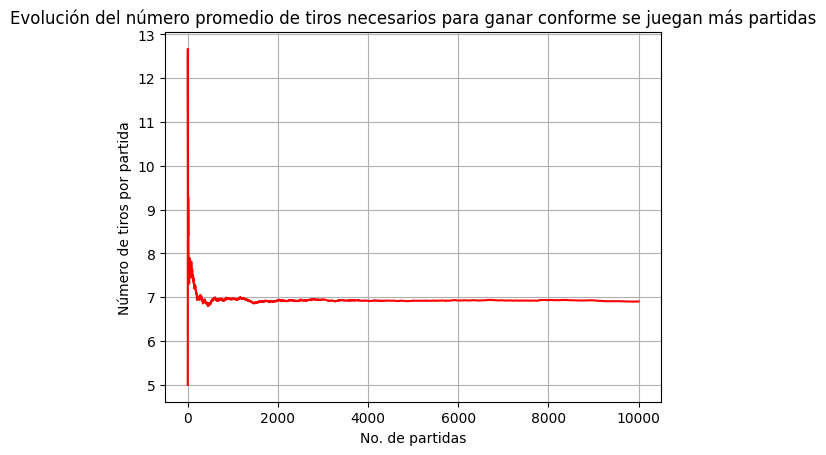

In [210]:
plt.plot(evol_prom, 'r')                     # La gráfica muestra que la convergencia está garantizada con 1000 iteraciones.
plt.xlabel('No. de partidas')    
plt.ylabel('Número de tiros por partida')
plt.grid(True)
plt.title('Evolución del número promedio de tiros necesarios para ganar conforme se juegan más partidas')
plt.show()

In [211]:
n = 1000    # Definiendo tamaño de muestra (número de partidas) "n" para cada experimento a simular.

In [212]:
print('mu =', np.mean(evol_prom), ', sigma =', np.std(evol_prom))

mu = 6.939133513724647 , sigma = 0.14084154800255333


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align}

Implementamos el siguiente código:

In [196]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error del número promedio estimado de tiros.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [213]:
N = int(np.ceil((2*np.std(evol_prom)*norm.ppf(1-alpha/2)/epsilon)**2))    # Cálculo del número de simulaciones necesarias del
print(N)                                                                  #experimento.

3049


In [201]:
def simulacion(N):                     # Función que devuelve una lista con los promedios del número de tiros estimados de los N
  prom = []                            #experimentos realizados.
  for i in range(N):
    evol_prom = experimento(n)
    prom.append(np.mean(evol_prom))
  return prom

In [214]:
prom = simulacion(N)    # Realizamos la simulación.

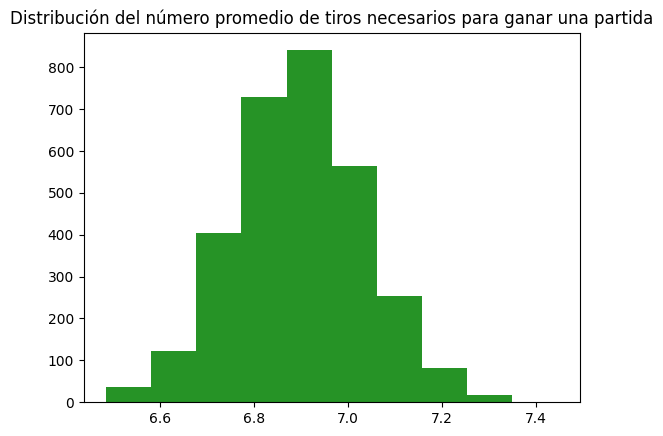

In [215]:
plt.hist(prom, color = 'g', alpha = 0.85)    # Las gráfica nos sugiere que la distribución del número de tiros promedio por partida
plt.title('Distribución del número promedio de tiros necesarios para ganar una partida') #es aparentemente normal.
plt.show()

In [216]:
print('mu =', np.mean(prom), ', sigma =', np.std(prom))

mu = 6.896423692649525 , sigma = 0.13760127400714128


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align}

Implementamos el siguiente código:

In [217]:
mu = np.mean(prom)                                         # Se presentan los intervalos de confianza para el promedio estimado
li = mu - norm.ppf(1-alpha/2) * np.std(prom)/np.sqrt(n)    #de la forma: 
ls = mu + norm.ppf(1-alpha/2) * np.std(prom)/np.sqrt(n)    #
print(li, '<', mu, '<', ls)                                #       Caso: Límite inferior < Promedio estimado < Límite superior

6.887895234042684 < 6.896423692649525 < 6.904952151256365


## **8. Comparamos con la solución analítica.**

Creamos nuestra matriz estocástica p de transición que modelará nuestro juego de serpientes y escaleras.

El estado final (la casilla ganadora: la 20) es un estado absorbente ya que, al ya haber ganado, no hay forma de "salir" de esa casilla.
$\hspace{5cm}$

\begin{equation*} M =
\begin{pmatrix}
0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/2 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 5/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
\end{equation*}$\hspace{5cm}$

Ahora generamos esta matriz de manera generalizada con el siguiente código:

In [218]:
# Creando matriz de ceros de n x m.
M = [[0]*n_squares for _ in range(n_squares)]

# Distribuímos las respectivas probabilidades para cada cambio de estado.
for i in range(n_squares):
  for j in range(n_squares):
    if j >= (i + 1) and j <= (i + 6):
      M[i][j] = 1 / 6
    if (i + 6) >= n_squares:
      rest = i + 6 - n_squares + 1
      M[i][n_squares - 1] = (rest + 1) / 6
    if M[i][j] > 1:
      M[i][j] = 1

# Colocamos las respectivas distribuciones de probabilidad que representa cada escalera.
for stair in stairs:
  M[stair[0] - 1] = [0]*n_squares
  M[stair[0] - 1][stair[1] - 1] = 1

# Colocamos las respectivas distribuciones de probabilidad que representa cada serpiente.
for snake in snakes:
  M[snake[0] - 1] = [0]*n_squares
  M[snake[0] - 1][snake[1] - 1] = 1

M = np.array(M)

### Forma canónica de una matriz estocástica

Consideremos cualquier cadena de Markov arbitraria. Reubicamos los estados para poner los transitorios primero. Si hay $\,r\,$ estados absorbentes y $\,t\,$ transitorios, la matriz de probabilidades de transición tendrá la siguiente forma canónica:

\begin{equation*} P =
\begin{pmatrix}
Q & R \\
\mathbf{0} & I
\end{pmatrix}
\end{equation*}

Aquí $\,I\,$ es la matriz identidad de orden $\,r\,$, $\,\mathbf{0}\,$ es una matriz nula $\,r\times t\,$, $\,R\,$ es una matriz $\,t\times r\,$ y $\,Q\,$ es una matriz $\,t\times t\,$.

Partiendo de nuestra matriz de transición $\,M$, se sigue que $\hspace{8cm}$

\begin{equation*} Q_{t\times t} =
\begin{pmatrix}
0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 & 1/6 & 1/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/6 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
\end{equation*}$\hspace{5cm}$


\begin{equation*} R_{t\times r} =
\begin{pmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
1/6 \\
0 \\
1/2 \\
0 \\
5/6 \\
1
\end{pmatrix}
\end{equation*}$\hspace{5cm}$

\begin{equation*} 0_{r\times t} =
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix}
\end{equation*}$\hspace{5cm}$

\begin{equation*} I_{r\times r} =
\begin{pmatrix}
1
\end{pmatrix}
\end{equation*}$\hspace{5cm}$

### Matriz fundamental

Está definida como

  \begin{equation*}
  N = (I - Q)^{-1}
  \end{equation*}

Ahora enunciamos.

**Teorema 1.** Dada una cadena que empieza en el estado $\,i$, denotamos por $\,t_i\,$ el tiempo promedio del número de pasos antes de que la cadena sea absorbida (i.e., el tiempo medio de absorción de todas las posibles realizaciones de una cadena que empieza en el estado $\,i\,$). Entonces $\,t_i\,$ se obtiene sumando todos los elementos de la fila $i$-ésima de la matriz fundamental $\,N\,$ del proceso.

Se sigue que al calcular $\,t_i\,$, también se considera el paso por el estado $\,i\,$. Sin embargo, el estado $1$ (la casilla de inicio) no lo debemos considerar, ya que al haber discretizado el tiempo y definirlo como cada lanzamiento de los dados (cada turno); entonces, al no haber manera de pasar nuevamente por la primera casilla, no existe lanzamiento (tiempo) en el que podamos regresar al estado $1$.

Por lo tanto, calculamos $\,t_1\,$ utilizando el teorema enunciado; pero sustrayendo el valor $N_{1,1}$, ya que no tomaremos en cuenta el paso por la primera casilla por lo anteriormente mencionado.

Implementamos el siguiente código:

In [219]:
Q = np.delete(np.delete(M, n_squares - 1, axis = 1), n_squares - 1, axis = 0)    # Determinamos la matriz Q.
N = np.linalg.inv(np.eye(n_squares - 1) - Q)                                     # Calculamos la matriz fundamental N.
sum_vec = np.sum(N, axis = 1)                                                    # Sumamos los valores de la primera fila de N.
mu_ana = sum_vec[0] - N[0][0]                                                    # Sustraemos el valor asociado a primera casilla.
print(mu_ana)

7.2913795203526135


# **Solución**

In [220]:
print('Si se juegan ' + str(n) + ' partidas,\n')

print('El número promedio de turnos necesarios para ganar una partida del juego de serpientes y escaleras planteado como problema,')
print('estimado mediante simulación, es de ' + str(mu) + ' turnos.\n')

print('La cual difiere en un ' + str(abs(mu - mu_ana)*100 / mu_ana) + '% de la solución analítica. Sin embargo, al tratarse de')
print('tiempo discreto, la solución estimada por simulación realmente difiere sólo un ', end = '')
print(str(abs(round(mu) - round(mu_ana))*100 / round(mu_ana)) + '% de la solución analítica')

Si se juegan 1000 partidas,

El número promedio de turnos necesarios para ganar una partida del juego de serpientes y escaleras planteado como problema,
estimado mediante simulación, es de 6.896423692649525 turnos.

La cual difiere en un 5.416750377629342% de la solución analítica. Sin embargo, al tratarse de
tiempo discreto, la solución estimada por simulación realmente difiere sólo un 0.0% de la solución analítica
